In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


e:\program\conda\envs\pandas\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

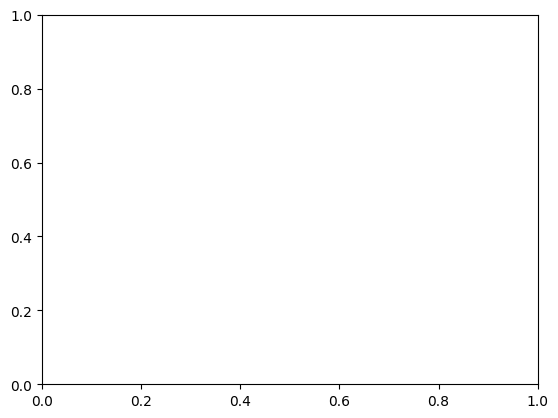

In [6]:
fig, ax = plt.subplots()

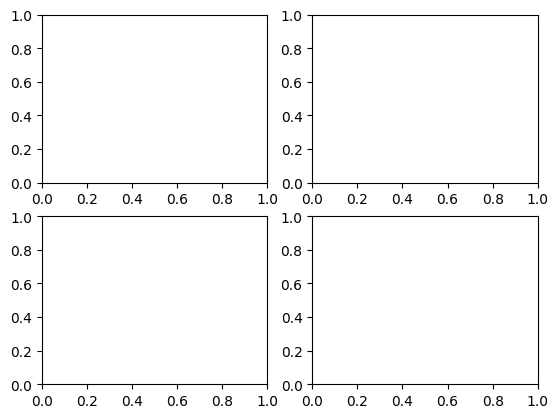

In [7]:
fig, ax = plt.subplots(2,2)

<Axes: xlabel='job_title_short'>

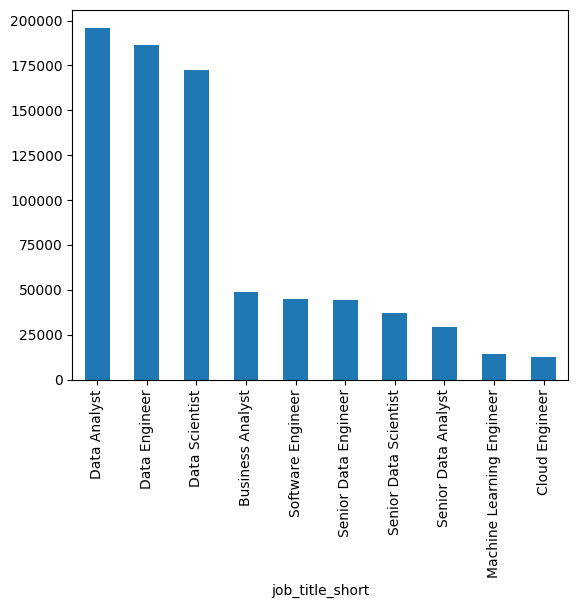

In [10]:
fig, ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar',ax=ax)

<Axes: xlabel='job_schedule_type'>

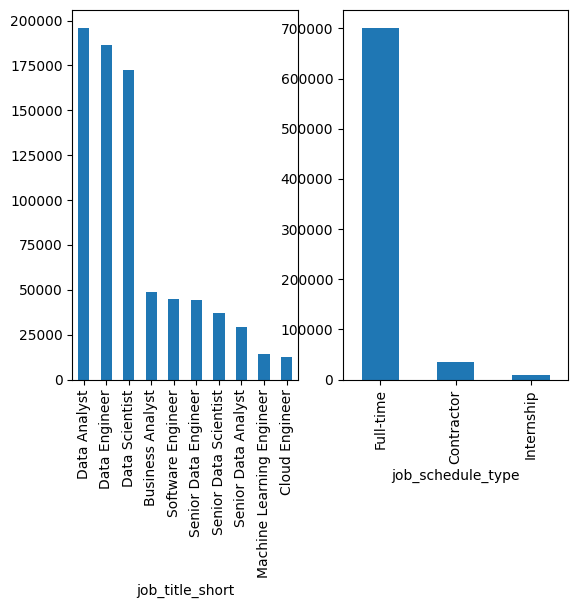

In [12]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

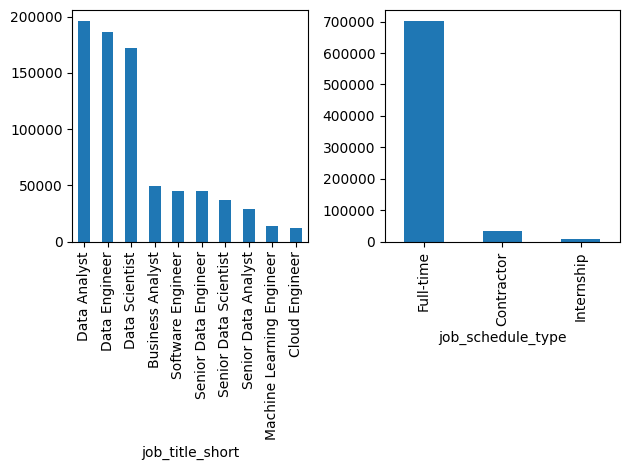

In [13]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])
fig.tight_layout()

In [14]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_count=  df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skill_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [15]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [20]:
job_title=['Data Scientist','Data Engineer','Data Analyst']

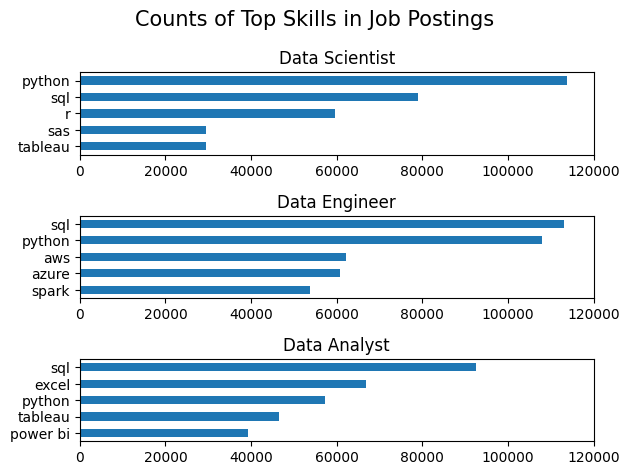

In [29]:
fig,ax = plt.subplots(3,1)

for i,job in enumerate(job_title):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of Top Skills in Job Postings',fontsize=15)
fig.tight_layout()    

In [31]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


<Axes: ylabel='count'>

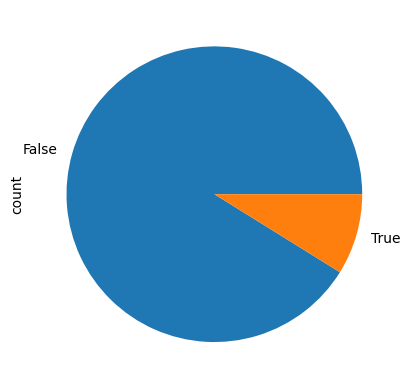

In [32]:
df['job_work_from_home'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

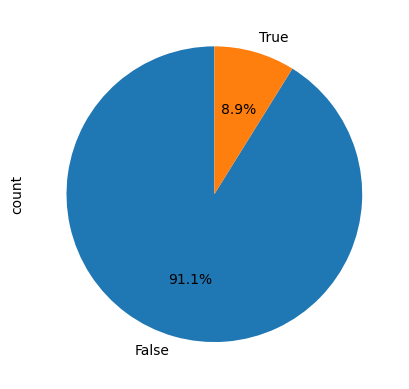

In [39]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

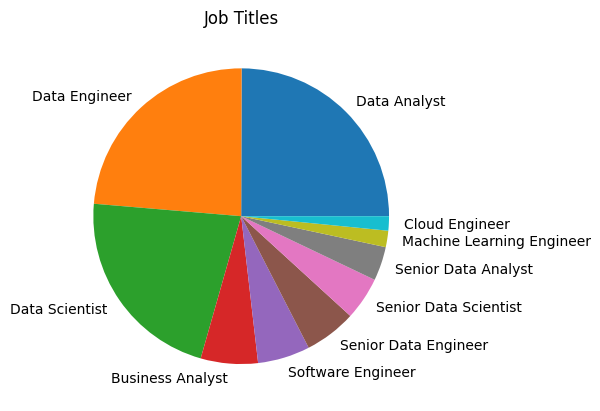

In [34]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles')
plt.ylabel("")
plt.show()

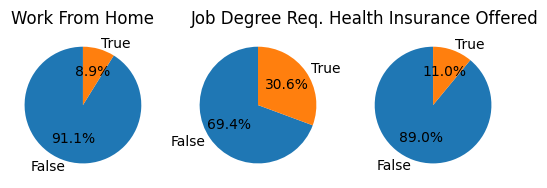

In [46]:
fig,ax = plt.subplots(1,3)
dict_column = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)

plt.show()